# Laboratorio 5

Integrantes:
- Milan Cabezas
- Felipe Urrutia

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from matplotlib import rc
import seaborn as sns

plt.style.use(['seaborn', "seaborn-dark"][0])
plt.rc('axes', titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update({'lines.markeredgewidth': 1})
plt.rcParams.update({'errorbar.capsize': 2})

## P1

### Ejercicio 1

In [2]:
def dinamica(t, z):
    x, p = z[0], z[1]
    u = 0 if p+1>=0 else 1
    dx = x*u
    dp = 1-u*(p+1)
    return np.array([dx, dp])

def solve_pontryagin(x0, T):
    def error(p0, x0, T):
        z0 = np.array([x0, p0[0]])
        sol_z = solve_ivp(dinamica, t_span=[0, T], y0=z0)
        pT = sol_z.y[1, -1]
        return 0.5*pT*pT
    
    p0 = 1
    opt_p0 = minimize(error, x0=p0, args=(x0, T)).x
    z0 = np.array([x0, opt_p0[0]])
    sol_z = solve_ivp(dinamica, t_span=[0, T], y0=z0, dense_output=True)
    z = sol_z.sol
    x = lambda t: z(t)[0]
    p = lambda t: z(t)[1]
    u = lambda t: 0 if p(t)+1>=0 else 1
    return (x, p, u)

In [126]:
def plot_p1(X0, T):
    fig, ax = plt.subplots(1, 3, figsize=(5*3, 5))
    for i in range(len(X0)):
        x0 = X0[i]
        x, p, u = solve_pontryagin(x0=x0, T=T)
        t_span = np.linspace(0, T)

        xt = x(t_span)
        pt = p(t_span)
        ut = [u(t) for t in t_span]
        
        ax[0].plot(t_span, xt, label=f"x0: {x0}")
        ax[1].plot(t_span, pt)
        ax[2].plot(t_span, ut);

    ax[0].set_xlabel("tiempo (t)")
    ax[1].set_xlabel("tiempo (t)")
    ax[2].set_xlabel("tiempo (t)");

    ax[0].set_title("estado (x)")
    ax[1].set_title("adjunto (p)")
    ax[2].set_title("control (u)");
    
    ax[0].legend();

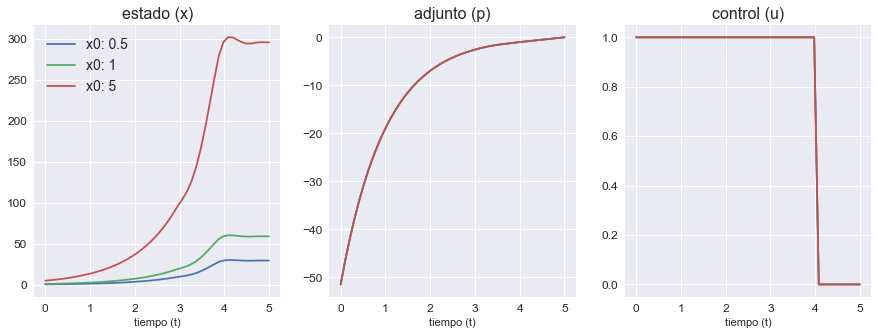

In [146]:
plot_p1(X0 = [0.5, 1, 5], T = 5)
plt.savefig("e1_1.pdf", bbox_inches='tight')

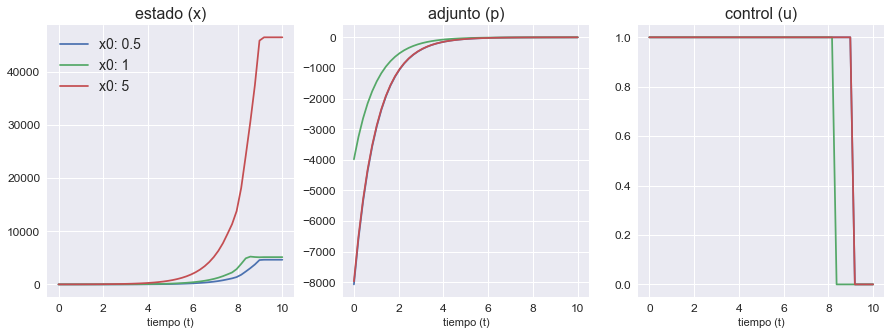

In [147]:
plot_p1(X0 = [0.5, 1, 5], T = 10)
plt.savefig("e1_2.pdf", bbox_inches='tight')

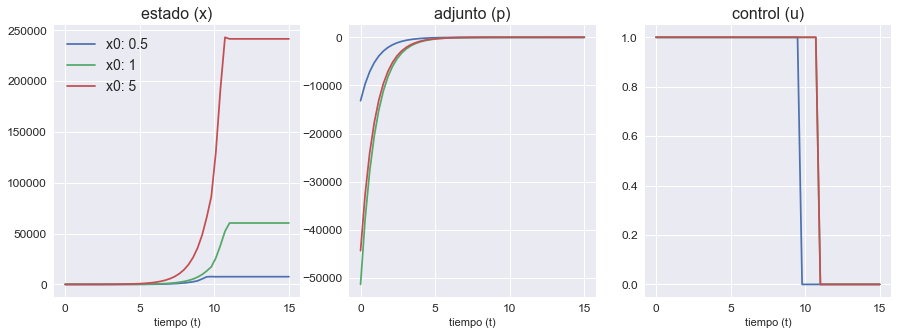

In [148]:
plot_p1(X0 = [0.5, 1, 5], T = 15)
plt.savefig("e1_3.pdf", bbox_inches='tight')

## P2

### Ejercicio 2

In [9]:
T = 10

def dt_V(s, y, T):
    a =  np.multiply(-y, np.exp(-s+T-1))
    b = -y
    return a*(s<T-1) + b*(s>=T-1)

def dx_V(s, y, T):
    a = np.exp(-s+T-1)
    b = (T-s)
    return a*(s<T-1) + b*(s>=T-1)

def check(s, y, T):
    return dt_V(s, y, T) + y + y * (dx_V(s, y, T)-1) * (dx_V(s, y, T)-1 > 0)

In [10]:
import seaborn as sns

Valor de la ecuacion

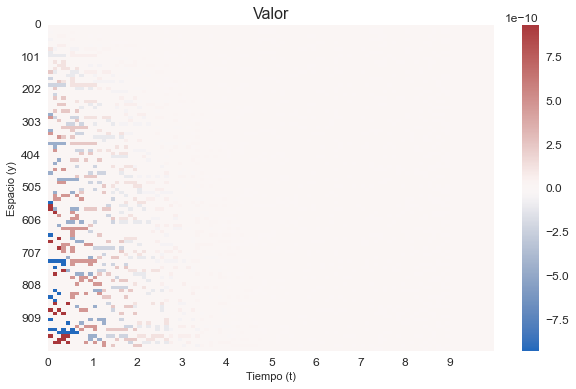

In [150]:
T = 10
M = 1000
S = np.linspace(0, T, 100)
Y = np.linspace(0, M, 100)

SS = []
YY = []
for s in S:
    for y in Y:
        SS.append(s)
        YY.append(y)
        
val = check(s=np.array(SS), y=np.array(YY), T=T)
Z = np.ones((Y.shape[0], S.shape[0]))
for i in range(S.shape[0]):
    for j in range(Y.shape[0]):
        Z[j, i] = val[i*S.shape[0]+j]

sns.heatmap(Z, annot=False, cmap="vlag");
plt.xticks(range(len(S)), [int(S[i]) if i%10 in [0, len(S)%10] else "" for i in range(len(S))], rotation=0);
plt.xlabel("Tiempo (t)")

plt.yticks(range(len(Y)), [int(Y[i]) if i%10 in [0, len(Y)%10] else "" for i in range(len(Y))], rotation=0);
plt.ylabel("Espacio (y)");
plt.title("Valor");

plt.savefig("e2_1.pdf", bbox_inches='tight')

```
Se observa que el valor es muy cercano a cero
```

## Ejercicio 3

In [141]:
def solve_hjb(x0, T):
    def dinamica_B(t, x):
        global T
        u = 0 if -dx_V(t, x, T)+1>0 else 1
        dx = x * u
        return np.array([dx])

    sol_x = solve_ivp(dinamica_B, t_span=[0, T], y0=np.array([x0]), dense_output=True)
    z = sol_x.sol
    x = lambda t: z(t)[0]
    u = lambda t: 0 if -dx_V(t, x(t), T)+1 > 0 else 1
    return (x, u)

def plot_p3(X0, T):
    fig, ax = plt.subplots(1, 2, figsize=(5*2, 5))
    for i in range(len(X0)):
        x0 = X0[i]
        x, u = solve_hjb(x0=x0, T=T)
        t_span = np.linspace(0, T)

        xt = x(t_span)
        ut = [u(t) for t in t_span]
        
        ax[0].plot(t_span, xt, label=f"x0: {x0}")
        ax[1].plot(t_span, ut)

    ax[0].set_xlabel("tiempo (t)")
    ax[1].set_xlabel("tiempo (t)")

    ax[0].set_title("estado (x)")
    ax[1].set_title("control (u)");
    
    ax[0].legend();

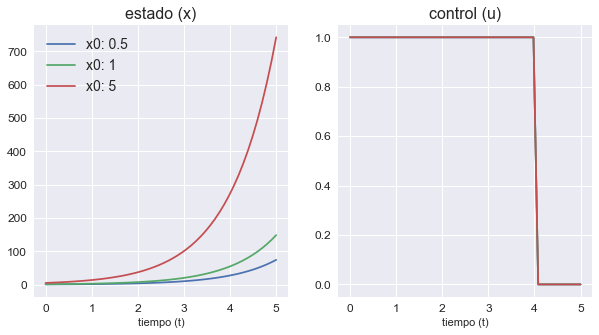

In [151]:
plot_p3(X0 = [0.5, 1, 5], T = 5)
plt.savefig("e3_1.pdf", bbox_inches='tight')

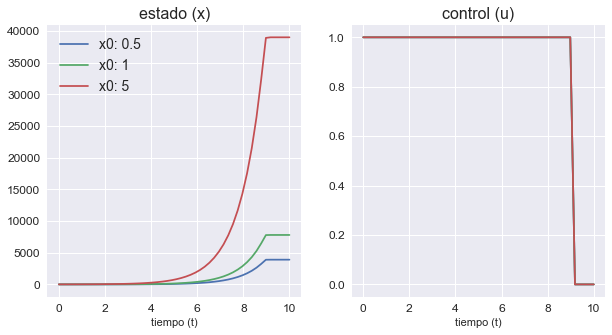

In [152]:
plot_p3(X0 = [0.5, 1, 5], T = 10)
plt.savefig("e3_2.pdf", bbox_inches='tight')

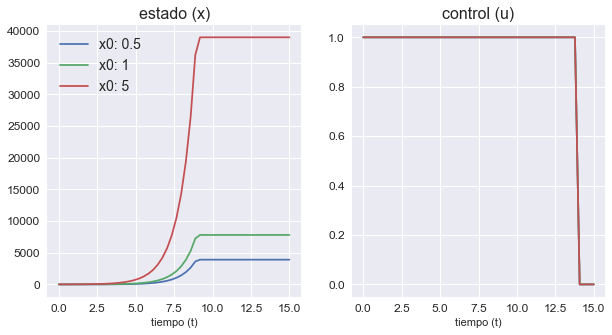

In [153]:
plot_p3(X0 = [0.5, 1, 5], T = 15)
plt.savefig("e3_3.pdf", bbox_inches='tight')

## Ejercicio 4

In [18]:
from bocop_solution import BOCOPSolution 
import os
import sys
import numpy as np

In [19]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [20]:
file_sols_m1 = {
    "exp1": "D:/github/MA4703/lab5/bocop/x0_0_01",
    "exp2": "D:/github/MA4703/lab5/bocop/x0_0_1",
    "exp3": "D:/github/MA4703/lab5/bocop/x0_1",
    "exp4": "D:/github/MA4703/lab5/bocop/x0_10",
    "exp5": "D:/github/MA4703/lab5/bocop/x0_100",
}
pc = False
sols_e = {
    k: BOCOPSolution(v) if pc else BOCOPSolution(v.replace("D:/github/MA4703/lab5/", ""))
    for k, v in file_sols_m1.items()
}

In [21]:
def plot_p4(sol):    
    controls = sol.controls
    times = sol.discretization_times
    states = sol.states

    fig, ax = plt.subplots(1, 3, figsize=(5*3, 5))
    ax[0].plot(times, states["x"].values)
    ax[0].set_xlabel("tiempo (t)")
    ax[0].set_title("estado (x)")
    
    ax[1].plot(times, states["z"].values)
    ax[1].set_xlabel("tiempo (t)")
    ax[1].set_title("consumo (c)")
    
    ax[2].plot(times, controls["u"].values)
    ax[2].set_xlabel("tiempo (t)")
    ax[2].set_title("control (u)")

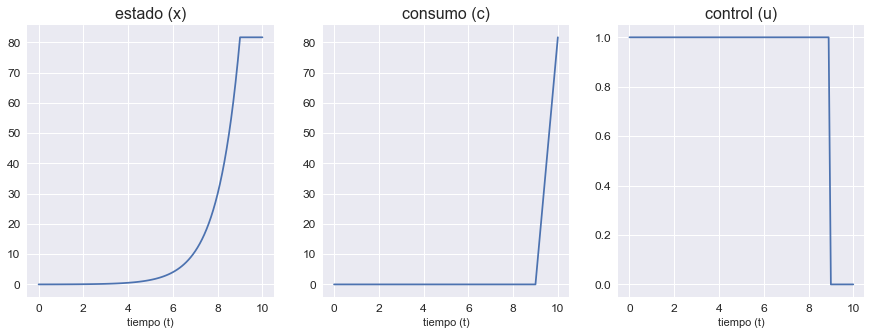

In [22]:
exp = 1
sol_p4_1 = sols_e[f"exp{exp}"]
plot_p4(sol_p4_1)

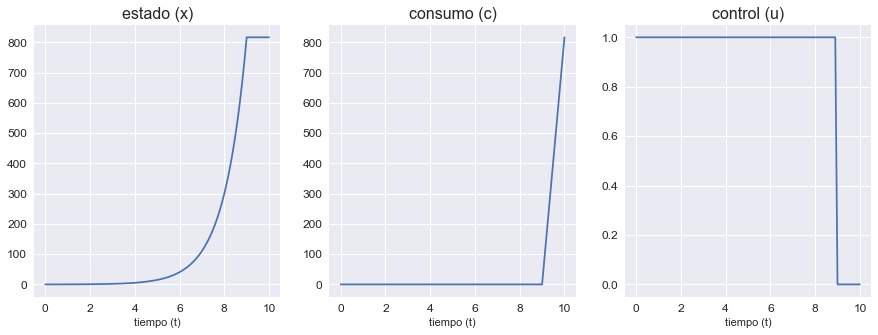

In [23]:
exp = 2
sol_p4_2 = sols_e[f"exp{exp}"]
plot_p4(sol_p4_2)

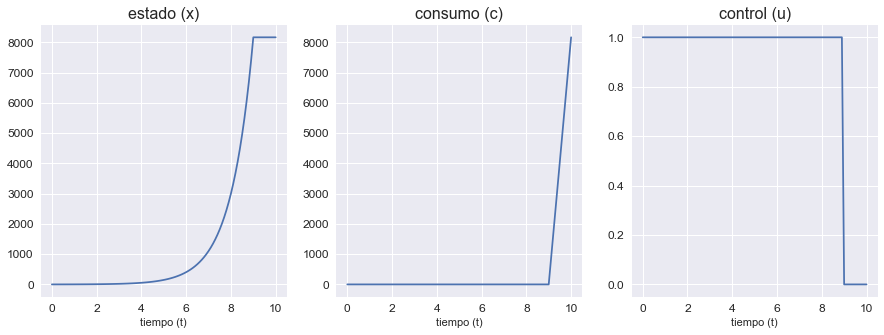

In [24]:
exp = 3
sol_p4_3 = sols_e[f"exp{exp}"]
plot_p4(sol_p4_3)

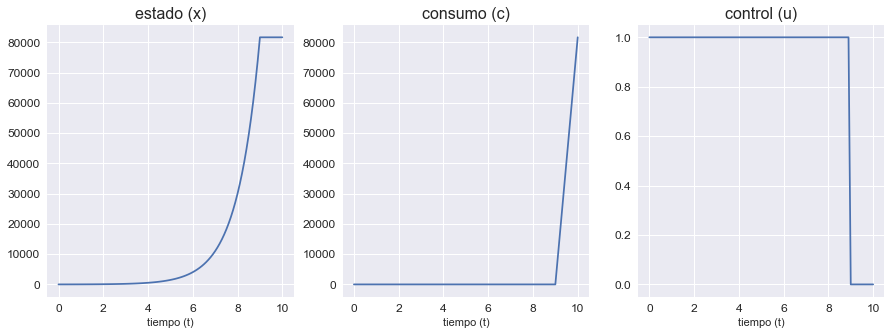

In [25]:
exp = 4
sol_p4_4 = sols_e[f"exp{exp}"]
plot_p4(sol_p4_4)

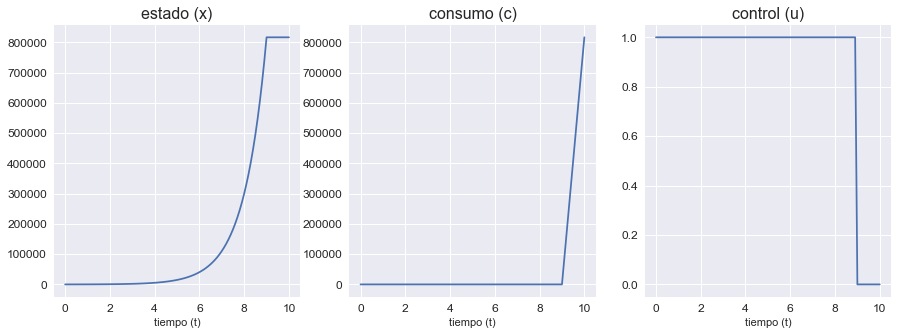

In [26]:
exp = 5
sol_p4_5 = sols_e[f"exp{exp}"]
plot_p4(sol_p4_5)

## Ejercicio 5